# Content:

In this notebook, we will demo the openai clip model

github repo [here](https://github.com/openai/CLIP)


In [ ]:
from IPython.display import clear_output, display

In [ ]:
%pip install torch torchvision
%pip install ftfy regex tqdm pillow
%pip install git+https://github.com/openai/CLIP.git

clear_output()

## Downloading Images

In [ ]:
!wget -O img_1.png https://images.unsplash.com/photo-1710871329594-b962eb958bc9?q=80&w=2670&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
!wget -O img_2.png https://images.unsplash.com/photo-1710169589950-ee8c3be7cbef?q=80&w=2288&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
!wget -O img_3.png https://images.unsplash.com/photo-1711014665068-f2168ee051be?q=80&w=2574&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D

clear_output()

In [ ]:
import requests
from PIL import Image

import torch
import clip

In [ ]:
captions = [
    'An image of cows',
    'An image of camels',
    'An image of an urban city',
    'An image of desert',
    'An image of a cafe'
]

# The preprocess function from clip will take care of resizing too but we're doing it for better displaying the images
imgs = [Image.open(img_path).resize((244, 244)) for img_path in ['img_1.png', 'img_2.png', 'img_3.png']]

## Load the model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

## Process text

In [ ]:
captions_processed = clip.tokenize(captions)

## Process Images

In [ ]:
imgs_processed = [preprocess(img) for img in imgs]
imgs_processed = torch.stack(imgs_processed, dim=0)

In [ ]:
imgs_processed.shape

torch.Size([3, 3, 224, 224])

## Inference the model



In [ ]:
with torch.no_grad():
    # logits per image: text scores for each image
    # logits per text: image scores for each text
    logits_per_image, logits_per_text = model(imgs_processed, captions_processed)

In [ ]:
logits_per_text.shape

torch.Size([5, 3])

## Display Results

An image of cows


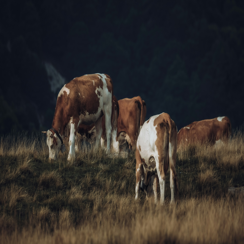

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
An image of camels


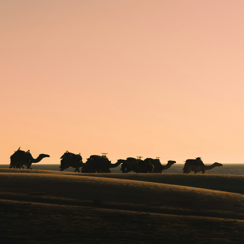

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
An image of an urban city


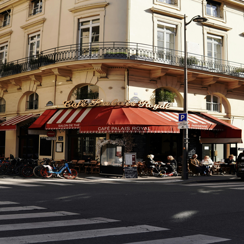

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
An image of desert


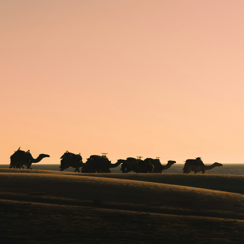

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
An image of a cafe


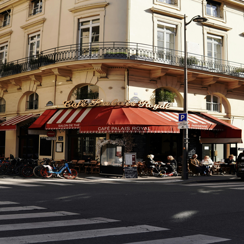

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for i, caption in enumerate(captions):

    print(caption)
    img_idx = logits_per_text[i].argmax()
    display(imgs[img_idx])
    print('--'*100)